# Window Functions in SQL

Window functions are used to perform calculations on a group of rows without combining them into a single result. This can be useful when you are calculating metrics such as an average over a period of time or a running total. Unlike a `GROUP BY`, it does not group rows into a single row. In this workspace, you will learn:
- How to define a window function that includes a set of rows 
- How to divide the set of rows included within a window function into partitions or frames
- How to calculate moving averages and running totals.

This workspace uses the Olympics data from the course [PostgreSQL Summary Stats and Window Functions](https://app.datacamp.com/learn/courses/postgresql-summary-stats-and-window-functions). You are free to create an integration to your own data or use one of the existing integrations. You can learn more about integrations [here](https://workspace-docs.datacamp.com/integrations/what-is-an-integration).

## Calculating row numbers
The example below uses `ROW_NUMBER()` to assign a row number to each row. The row numbers are assigned based on the results of the query. The `OVER()` clause defines the range of rows upon which the calculations would be performed. By default, the `OVER()` clause will use the entire result of the query.

_Note: `ROW_NUMBER()` assigns a unique number to each row. If you want rows with the same value to receive identical numbers, you can use `RANK()` or `DENSE_RANK()`. Refer to [this video](https://campus.datacamp.com/courses/postgresql-summary-stats-and-window-functions/fetching-ranking-and-paging?ex=5) to learn more about the differences between these two functions._

👇&nbsp;&nbsp;**To run a SQL cell like the one below, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [1]:
SELECT 
	year, 
    athlete,
    -- Assign a row number to athletes
	ROW_NUMBER() OVER() AS athlete_number
FROM medals.summer_medals
LIMIT 5

,year,athlete,athlete_number
0,1896,HAJOS Alfred,1
1,1896,HERSCHMANN Otto,2
2,1896,DRIVAS Dimitrios,3
3,1896,MALOKINIS Ioannis,4
4,1896,CHASAPIS Spiridon,5


## Ordering the rows within a window

To define an order, you can use `ORDER BY` within the `OVER()` clause. This order is applied to the range of rows defined within the window function. In the example below, row numbers are assigned to each event based on the descending number of tickets sold. 

If you want to know more about ordering in window functions, you can check out [this video](https://campus.datacamp.com/courses/postgresql-summary-stats-and-window-functions/introduction-to-window-functions?ex=5).

In [2]:
SELECT 
  athlete,
  medal_count, 
  -- Assign row numbers to athletes based on the descending number of medals won
  ROW_NUMBER() OVER(ORDER BY medal_count DESC) as medal_ranking
FROM 
  (
    -- Fetch athlete and the number of medals they won
    SELECT athlete, COUNT(*) AS medal_count
    FROM medals.summer_medals
    GROUP BY athlete
  ) AS medal_counts

,athlete,medal_count,medal_ranking
0,PHELPS Michael,22,1
1,LATYNINA Larisa,18,2
2,ANDRIANOV Nikolay,15,3
3,MANGIAROTTI Edoardo,13,4
4,ONO Takashi,13,5
...,...,...,...
22757,TOMAN Ladislav,1,22758
22758,OUTTERIDGE Nathan,1,22759
22759,LISKOVA Hana,1,22760
22760,POLENOVA Elena,1,22761


## Calculating window functions over partitions

`OVER()` has a clause called `PARTITION BY`, which divides the range of rows defined within the window function into partitions. If it is not used, the entire result of the query is treated as one partition. The window is divided into partitions based on the `country` in the example below.

You can learn more about partitions in [this video](https://campus.datacamp.com/courses/postgresql-summary-stats-and-window-functions/introduction-to-window-functions?ex=9).

In [3]:
SELECT 
  athlete,
  country,
  medal_count, 
  --Assign row numbers to each country based on the descending number of medals won while partitioning by country
  ROW_NUMBER() OVER(PARTITION BY country ORDER BY medal_count DESC) AS medal_ranking
FROM 
  (
    -- Fetch athlete, country, and the number of medals athlete won
    SELECT 
		athlete,
      	country,
      	COUNT(*) AS medal_count
    FROM medals.summer_medals
    WHERE country IN ('QAT', 'PHI')
    GROUP BY athlete, country
  ) AS medal_counts
ORDER BY country, medal_count DESC

,athlete,country,medal_count,medal_ranking
0,YLDEFONSO Teofilo,PHI,2,1
1,VELASCO Mansueto,PHI,1,2
2,VELASCO Roel,PHI,1,3
3,VILLANUEVA Anthony N.,PHI,1,4
4,VILLANUEVA Jose,PHI,1,5
5,WHITE Miguel S.,PHI,1,6
6,SERANTES Leopoldo,PHI,1,7
7,TORIBIO Simeon Galvez,PHI,1,8
8,BARSHIM Mutaz Essa,QAT,1,1
9,AL-ATTIYAH Nasser,QAT,1,2


## Calculating a moving average
Up until now, `ROW_NUMBER()` was used to assign numbers to rows. Window functions can also be used to perform aggregations over rows. Let's begin by calculating a moving average. Moving averages take the average value over a previous number of rows and can help eliminate noise from data and identify trends.

To calculate the moving average, we again use `OVER()`, but this time in combination with the `AVG()` function. By default, this will calculate the average over all previous rows.

You can find more information about moving averages [here](https://campus.datacamp.com/courses/postgresql-summary-stats-and-window-functions/aggregate-window-functions-and-frames?ex=9).

In [4]:
SELECT 
  year,
  medal_count,
  -- Calculate the moving average
  AVG(medal_count) OVER(ORDER BY year) as average_medal_count 
FROM 
  (
    -- Fetch the year and number of medals won
    SELECT 
      	year, COUNT(*) AS medal_count
    FROM medals.summer_medals
    -- Narrow the results to Canada
    WHERE country = 'CAN'
    GROUP BY year
  ) AS canadian_medals

,year,medal_count,average_medal_count
0,1900,2,2.000000
1,1904,35,18.500000
2,1908,51,29.333333
3,1912,8,24.000000
4,1920,16,22.400000
5,1924,20,22.000000
6,1928,33,23.571429
7,1932,38,25.375000
8,1936,22,25.000000
9,1948,6,23.100000


## Adjusting the range of window functions
`Frames` are used to define the range of rows for a windows function. They are specified within `OVER()`. The range can be defined by using `ROWS BETWEEN [start] and [finish]`. The start and finish can be one of the three clauses - `PRECEDING`, `CURRENT ROW`, and `FOLLOWING`. 

For example:  
- `ROWS BETWEEN 2 PRECEDING AND CURRENT ROW` will define a frame that starts two rows before the current row and ends at the current row.  
- `ROWS BETWEEN 1 PRECEDING AND 3 FOLLOWING` will define a frame that starts one row before the current row and ends three rows after the current row.
- `ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW` will define a frame that starts from the first row and ends at the current row.

The following query calculates the moving average for the Canadian team's medal count for the past three summer Olympics. You can find more information about frames [here](https://campus.datacamp.com/courses/postgresql-summary-stats-and-window-functions/aggregate-window-functions-and-frames?ex=5).


In [5]:
SELECT 
  year,
  medal_count,
  -- Calculate moving average over 3 rows
  AVG(medal_count) OVER(ORDER BY year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) as last_three_average_medal_count 
FROM 
  (
    -- Fetch the year and number of medals won
    SELECT 
      	year,
      	COUNT(*) AS medal_count
    FROM medals.summer_medals
    -- Narrow the results to Canada
    WHERE country = 'CAN'
    GROUP BY year
  ) AS canadian_medals

,year,medal_count,last_three_average_medal_count
0,1900,2,2.000000
1,1904,35,18.500000
2,1908,51,29.333333
3,1912,8,31.333333
4,1920,16,25.000000
5,1924,20,14.666667
6,1928,33,23.000000
7,1932,38,30.333333
8,1936,22,31.000000
9,1948,6,22.000000


### Plotting the moving average
The plot below shows how a moving average removes noise by plotting both the original column and the moving average.

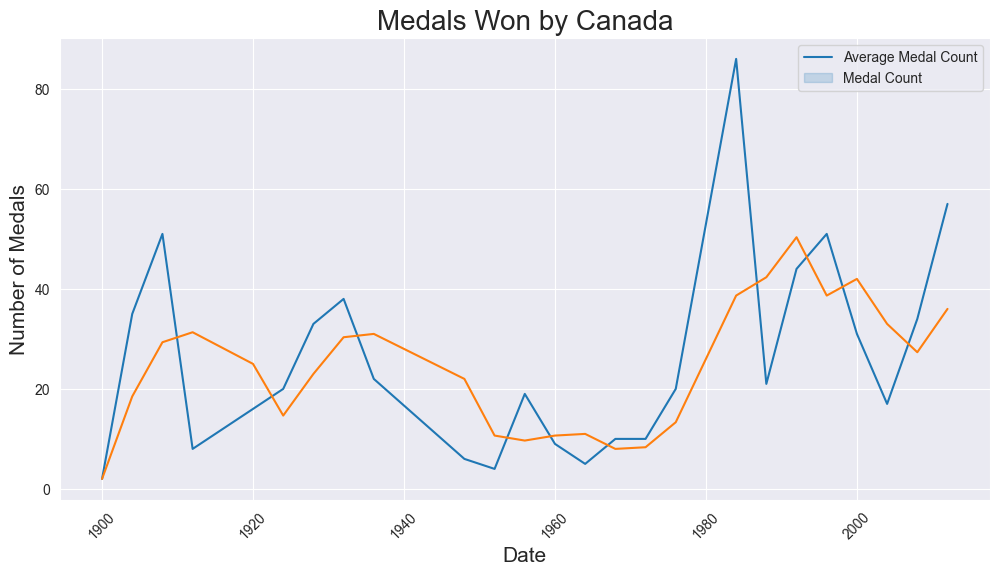

In [6]:
# Import libraries and set plotting style
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"]=(12, 6)

# Create the line plots
sns.lineplot(x='year', y='medal_count', data=moving_average)
sns.lineplot(x='year', y='last_three_average_medal_count', data=moving_average)

# Add labels and show the plot
plt.title('Medals Won by Canada', fontsize=20)
plt.xlabel('Date', fontsize=15) 
plt.ylabel('Number of Medals', fontsize=15)
plt.xticks(rotation=45)
plt.legend(labels=["Average Medal Count","Medal Count"])
plt.show()

## Calculating a running total
A running total calculates the total sum of a column over the preceding values and the current value. It is performed in much the same way as a moving average, except that `SUM()` is used in place of `AVG()`.

The following query calculates the total number of medals won by Canada over time.

In [7]:
SELECT 
  year,
  medal_count,
  -- Calculate a running total
  SUM(medal_count) OVER(ORDER BY year) as total_medal_count 
FROM 
  (
    -- Fetch the year and number of medals won
    SELECT 
      	year,
      	COUNT(*) AS medal_count
    FROM medals.summer_medals
    -- Narrow the results to Canada
    WHERE country = 'CAN'
    GROUP BY year
  ) AS canadian_medals

,year,medal_count,total_medal_count
0,1900,2,2
1,1904,35,37
2,1908,51,88
3,1912,8,96
4,1920,16,112
5,1924,20,132
6,1928,33,165
7,1932,38,203
8,1936,22,225
9,1948,6,231


### Plotting a running total
The plot below visualizes the medal count by year and the total medal count over time. Notice that while the medal count may fluctuate yearly, the running total always increases.

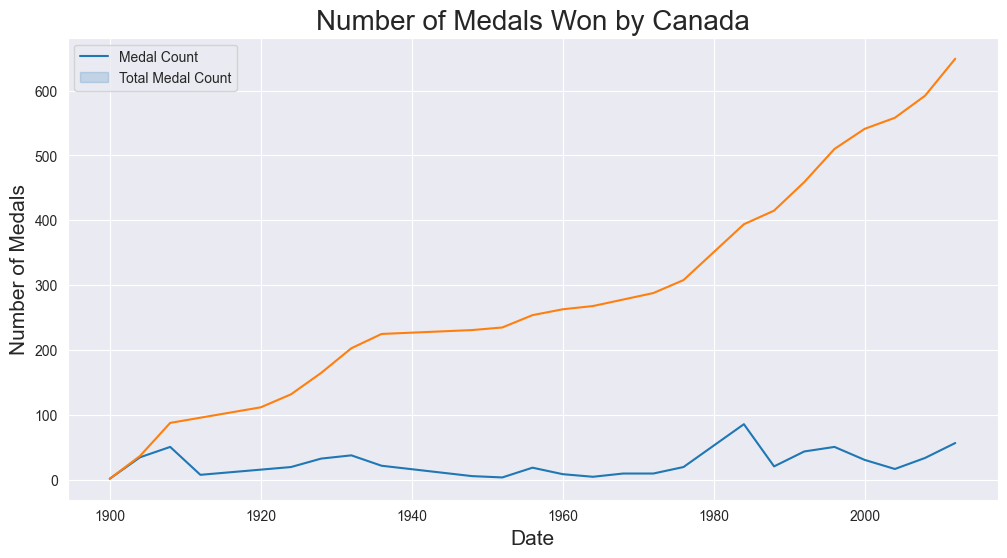

In [8]:
# Create the line plots
sns.lineplot(x='year', y='medal_count', data=running_total, legend=True)
sns.lineplot(x='year', y='total_medal_count', data=running_total)

# Add labels and show the plot
plt.title('Number of Medals Won by Canada', fontsize=20)
plt.xlabel('Date', fontsize=15) 
plt.ylabel('Number of Medals', fontsize=15)
plt.legend(labels=["Medal Count","Total Medal Count"])
plt.show()

## Next Steps
If you want to learn more about summary statistics and window functions in PostgreSQL, be sure to check out [PostgreSQL Summary Stats and Window Functions](https://app.datacamp.com/learn/courses/postgresql-summary-stats-and-window-functions). If you'd like to learn about other functions related to text and date data, you can also check out [Functions for Manipulating Data in PostgreSQL](https://app.datacamp.com/learn/courses/functions-for-manipulating-data-in-postgresql).

If you are interested in applying these skills to other SQL databases, check out our <a href ='https://app.datacamp.com/workspace/integrations'> sample integrations </a> here!